# Corona Prediction Model

In [397]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

directory = "C:/Users/我的电脑/Desktop/Project/Corona/"

warnings.filterwarnings('ignore')

$$ \frac{dn}{dt} = k \bigg(A-n\bigg)\bigg(n(t-b) - n(t-a)\bigg) $$

In [398]:
n_m = [15, 15, 15, 15, 15, 15, 35, 35, 35, 53, 57, 60, 60, 63, 68, 75, 100, 124, 158, 221, 319, 435,\
       541, 704, 994, 1301, 1697, 2247, 2943, 3680, 4663, 6411, 9259, 13789]
n_m = n_m[-18:]

In [399]:
A = 327.2*10**6
a = 12
k = 10**(-9)
dt = 0.01

def chi_sqr(a,b,k):
    t = 0
    n = [n_m[0]]
    dndt = [0.01]
    time_steps = int(len(n_m)/dt)+1
    for trial in range(time_steps):
        t += dt
        if len(n) < a/dt:
            n_0 = 0
        else:
            n_0 = n[-int(a/dt)]
        if len(n) < b/dt:
            n_1 = 0
        else:
            n_1 = n[-int(b/dt)]
        n += [n[-1]+dndt[-1]*dt]
        dndt += [k*(A-n[-1])*(n_1-n_0)]
    error = 0
    for j in range(len(n_m)):
        error += (n_m[j]-n[int(j/dt)])**2
    return error

def get_func(a,b,k):
    t = 0
    n = [n_m[0]]
    dndt = [0.01]
    time_steps = int((len(n_m)+1)/dt)+1
    for trial in range(time_steps):
        t += dt
        if len(n) < a/dt:
            n_0 = 0
        else:
            n_0 = n[-int(a/dt)]
        if len(n) < b/dt:
            n_1 = 0
        else:
            n_1 = n[-int(b/dt)]
        n += [n[-1]+dndt[-1]*dt]
        dndt += [k*(A-n[-1])*(n_1-n_0)]
    func = []
    for j in range(len(n_m)+1):
        func += [n[int(j/dt)]]
    return func

def grad_descent(a,b,k,step):
    d = chi_sqr(a,b,k)
    a_list = []
    b_list = []
    k_list = []
    for n in range(10**6):
        a_1 = a*(2*np.random.random())
        b_1 = a*(2*np.random.random())
        k_1 = k*(2*np.random.random())
        d_1 = chi_sqr(a_1,b_1,k_1)
        a_2 = a_1 - d*(a_1-a)/(d_1-d)*step
        b_2 = b_1 - d*(b_1-b)/(d_1-d)*step
        k_2 = k_1 - d*(k_1-k)/(d_1-d)*step
        if d_1<d:
            k = k_1
            k_1 = k_2
            a = a_1
            a_1 = a_2
            b = b_1
            b_1 = b_2
            d = d_1
        a_list += [a]
        b_list += [b]
        k_list += [k]
    plt.plot(a_list)
    plt.show()
    plt.plot(b_list)
    plt.show()
    plt.plot(k_list)
    plt.show()
    return [a,b,k,d]

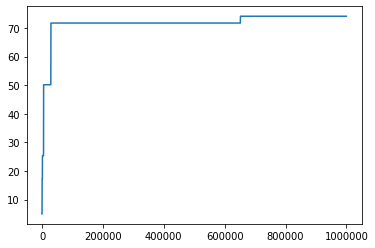

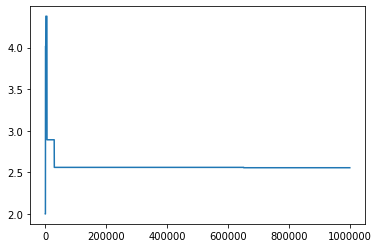

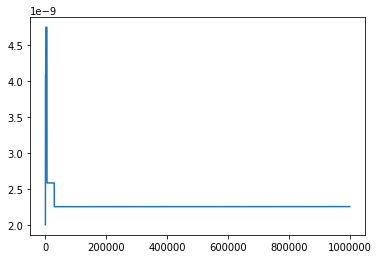

In [400]:
params = grad_descent(5,2,2.0*10**(-9),0.1)

In [401]:
n_c = get_func(params[0], params[1], params[2])

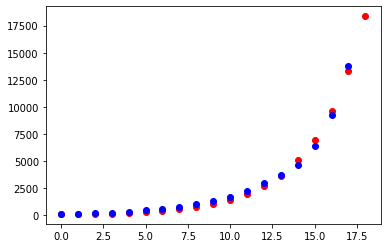

In [402]:
t_0 = list(range(len(n_c)))
t_1 = list(range(len(n_m)))
plt.plot(t_0,n_c,'ro',t_1,n_m,'bo')

In [403]:
n_c[-1]

18367.92076758579

In [404]:
params[0]

74.12741016036726

In [405]:
params[1]

2.5551279195748346

# Sklearn Logistic Model

In [406]:
data_frame = pd.read_csv(directory+'time_series_covid_19_confirmed.csv')

In [407]:
data_frame = data_frame[data_frame['Province/State'].isin(['Alabama', \
    'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', \
    'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', \
    'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', \
    'Maryland', 'Massachusetts', 'Michigan', 'Minnesota', 'Michigan', \
    'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada', \
    'New Hampshire', 'New Mexico', 'New York', 'New Jersey', \
    'North Carolina', 'North Dakota', 'Ohio', 'Oregon', 'Oklahoma', \
    'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota', \
    'Tennessee', 'Utah', 'Texas', 'Vermont', 'Virginia', 'Washington', \
    'West Virginia', 'Wisconsin', 'Wyoming'])]

In [408]:
data_frame = data_frame.drop(['Lat', 'Long', 'Country/Region', '1/22/20', '1/23/20', \
                '1/24/20', '1/25/20', '1/26/20', '1/27/20', '1/28/20', \
                '1/29/20', '1/30/20', '1/31/20', '2/1/20', '2/2/20', \
                '2/3/20', '2/4/20', '2/5/20', '2/6/20', '2/7/20', \
                '2/8/20', '2/9/20', '2/10/20', '2/11/20', '2/12/20', \
                '2/13/20', '2/14/20', '2/15/20', '2/16/20', '2/17/20', \
                '2/18/20', '2/19/20', '2/20/20', '2/21/20', '2/22/20', \
                '2/23/20', '2/24/20', '2/25/20', '2/26/20', '2/27/20', \
                '2/28/20', '2/29/20', '3/1/20', '3/2/20', '3/3/20', \
                '3/4/20', '3/5/20', '3/6/20', '3/7/20', '3/8/20', '3/9/20' \
                ],axis=1)

In [409]:
new_data_frame=pd.DataFrame(columns=['Date','State','Previous','Current','Tomorrow'])

In [410]:
for n in range(data_frame.shape[0]):
    row = data_frame.iloc[n]
    size = new_data_frame.shape[0]
    new_data_frame.loc[size+1] = ['3/11/20', row['Province/State'], row['3/10/20'], \
                          row['3/11/20'], row['3/12/20']]
    new_data_frame.loc[size+2] = ['3/12/20', row['Province/State'], row['3/11/20'], \
                          row['3/12/20'], row['3/13/20']]
    new_data_frame.loc[size+3] = ['3/13/20', row['Province/State'], row['3/12/20'], \
                          row['3/13/20'], row['3/14/20']]

In [411]:
new_data_frame.to_csv(directory+'data.csv',index=False)

In [412]:
test_data_frame = pd.read_csv(directory+'data.csv')
test_data_frame = test_data_frame.replace(['3/11/20', '3/12/20', \
                '3/13/20'],[0, 1, 2])
test_data_frame = test_data_frame.drop(columns=['State'],\
            axis=1).join(pd.get_dummies(test_data_frame.State))
Xlr, Xtestlr, ylr, ytestlr = train_test_split(\
    test_data_frame.drop(columns=['Tomorrow'], axis=1).values, \
    test_data_frame[['Tomorrow']].values, random_state=5)
clf = LogisticRegression(solver='lbfgs')
clf.fit(Xlr, ylr)
print(accuracy_score(clf.predict(Xtestlr), ytestlr))

0.18421052631578946


In [413]:
test_data_frame=pd.DataFrame(columns=['Date','State','Previous','Current'])
for n in range(data_frame.shape[0]):
    row = data_frame.iloc[n]
    size = test_data_frame.shape[0]
    test_data_frame.loc[size+1] = [3, row['Province/State'], row['3/13/20'], \
                          row['3/14/20']]
test_data_frame = test_data_frame.drop(columns=['State'],\
            axis=1).join(pd.get_dummies(test_data_frame.State))
cases = clf.predict(test_data_frame)
cases.sum()

1912